#  Лабораторная работа №1 «Дискретизация аналоговых сигналов»
Радиофизическая лаборатория 2020-2021 уч. год., понедельник 17:05–20:00
Группы Б01-818, С01-819 ФРКТ МФТИ


# Занятие 1. Классификация сигналов: аналоговые, дискретные, цифровые.

In [1]:
# Обновление библиотеки Matplotlib (требуется >=3.3.4)

In [3]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

## Задача 1.1. Дискретизация и квантование.

In [4]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

| Варианты: |   1 |    2 |    3 |   4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |
|:---------:|----:|-----:|-----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     **N**     |  15 |   20 |   30 |  12 |   15 |   30 |   25 |   18 |   10 |   25 |   20 |   15 |
|   $f_0$**, Гц**   | 200 |  250 |  400 | 200 |  600 |  750 | 1200 |  600 |  400 |  500 |  800 |  400 |
|   $f_s$**, Гц**   | 500 | 1250 | 2000 | 600 | 1500 | 3750 | 6000 | 1800 | 1000 | 2500 | 4000 | 1200 |

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов. 

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?

2) Как изменяется абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?

In [5]:
N=10                                    # Число отсчетов по времени
f0=400.                                # Частота синусоиды в Гц
fs=1000.                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=20                         # число уровней квантования

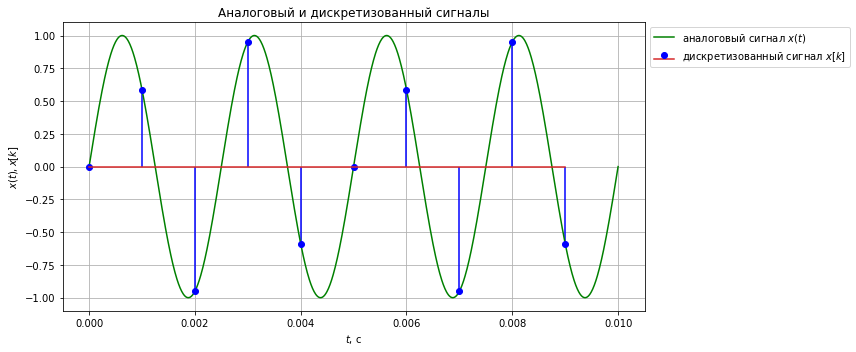

In [6]:
          # Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[12, 5])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [9]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

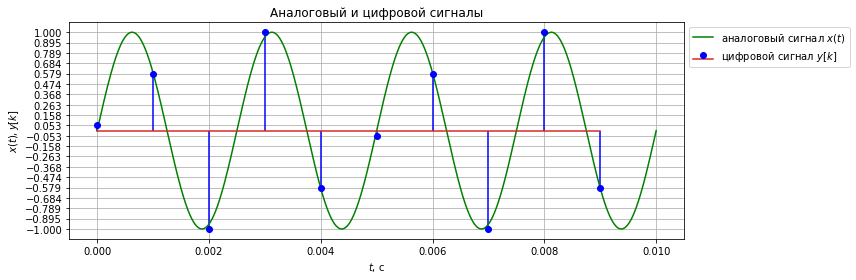

In [11]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[12, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

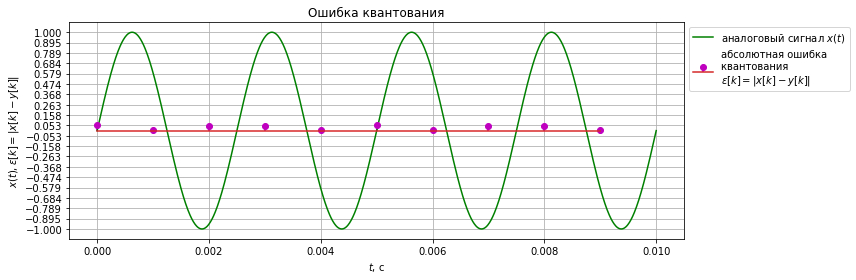

In [12]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

## Задача 1.2. Декодирование .wav файла

In [13]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |         7        |       8      |        9       |     10    |        11       |     12     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:----------------:|:------------:|:--------------:|:---------:|:---------------:|:----------:|
| **Имя файла** | clarinet.wav | flute.wav | glockenspiel.wav | guitar.wav | tuning-fork.wav | vibraphone.wav | glockenspiel.wav | clarinet.wav | vibraphone.wav | flute.wav | tuning-fork.wav | guitar.wav |

Декодируйте .wav файл в соотвествии с Вашим вариантом из таблицы. 

1) Определите частоту дискретизации, битную глубину записи (соотвествует dtype) и соотвествующее ей колличество уровней квантования. 

2) Сравните растояние между отсчетами по оси времени на графике с частотой дискретизации.

3) Поменяйте ось времени так, чтобы первому отсчету наблюдаемого диапазона соотвествовало время от начала файла.

4) Определите длину записи в секундах.

5) Оцените объем файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (использовать данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравние с реальным объемом файла. 

In [14]:
from IPython.display import Audio
Audio('vibraphone.wav')

In [24]:
fs, x = scipy.io.wavfile.read('vibraphone.wav') # чтение аудиофайла 

In [25]:
fs     #частота дискретизации в Гц

44100

In [55]:
1/fs * 1e6 # расстояние между осчётами мкс

22.675736961451246

In [56]:
x.size / fs # длина аудиозаписи в секундаx

3.250249433106576

In [26]:
x      #массив значений x[k]

array([-29, -46, -46, ...,   1,   1,  -3], dtype=int16)

In [27]:
print("Число дискретных уровней", 2 ** 16)

Число дискретных уровней 65536


In [28]:
x.size

143336

In [66]:
x.size * 16 / 8 / 1024 # размер в КБ

279.953125

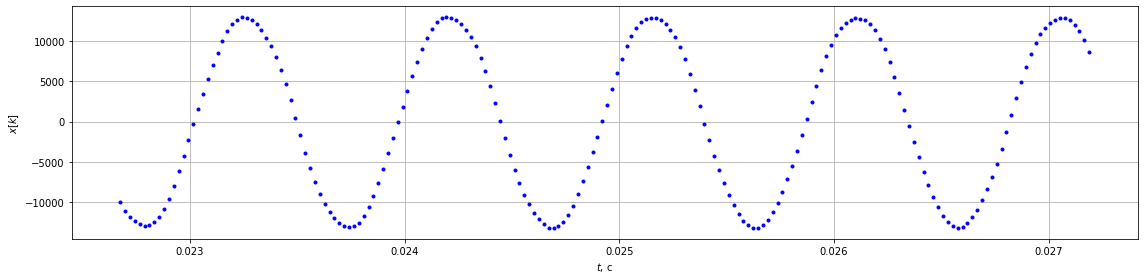

In [62]:
first = 1000
amount = 200
x1=x[first:first+amount]                     # выбор наблюдаемого диапазона
k=np.arange(first, first + amount)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[16, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками
plt.grid()
plt.xlabel("$t$, c")
plt.ylabel("$x[k]$")
plt.tight_layout()

# Занятие 2. Спектры импульсных и периодических сигналов.

In [72]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

## Задача 2.1. Спектры симметричных оконных функций

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Ниже приведен пример вычисления модуля спектральной плотности $|X(f)|$ для прямоугольного окна длительностью $\tau=150$ мкс. 

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   |t|-\tau /2, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$



Привести аналитические формулы спектральной плотности для этих импульсов. Заполнить таблицу для трех окон.
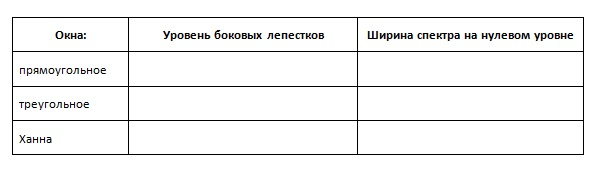


а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg (\dfrac{X(f)}{X(0)})$)

б) расположение нулей $|X(f)|$ (практич. и теоретическое)

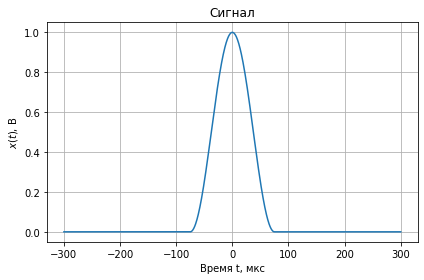

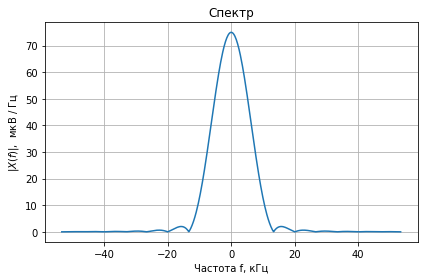

In [110]:
tau=150e-6 #100 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0
    
def triag(t, tau):
    if np.abs(t) <= tau / 2:
        return tau / 2 - np.abs(t)
    return 0

def hann(t, tau):
    if np.abs(t) <= tau / 2:
        return 1/2 * (1 + np.cos(2 * np.pi * t / tau))
    return 0

sig = hann

t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [sig(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sig, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

## Задача 2.2. Теорема запаздывания для преобразования Фурье

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
|     **E, В**    | 0.1 | 0.5 |   1  |   5  |  1  |   5  | 0.5 |  2.5 |   6  | 1.6 |   7  |   8  |
| **$\tau$, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |

Ниже приведен пример вычисления спектральной плотности для несимметричного прямоугольного импульса амплитудой $E=0.1$ В, длительностью $\tau=100$ мкс. В данном случае импульс начинается в начале отсчета оси времени. 

Для заданных параметров $E$ и $\tau$ из таблицы, построить и сравнить графики $\text{Re} X(f)$, $\text{Im} X(f)$, $|X(f)|$ для прямоугольного импульса, начинающегося в моменты времени $-\tau /2$ и $0$. Как согласуются результаты с теоремой запаздывания для преобразования Фурье?


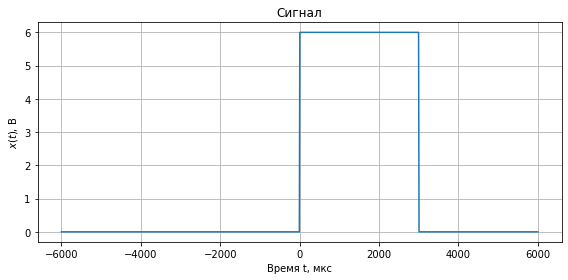

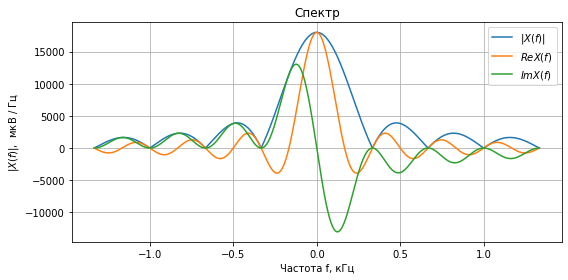

In [107]:
tau=3000*1e-6 #150 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 6.0 # 0.1 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2 * tau, 2 * tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

In [ ]:
def boxcar(t, tau):
    if 0<t<tau:
        return 6.0 # 0.1 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

## Задача 2.3. Спектр отрезка синусоиды

|  Варианты:  |  1  |  2  |  3  |  4  |  5  |  6 |  7  |  8  |  9  | 10 |  11 |  12 |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:--:|:---:|:---:|:---:|:--:|:---:|:---:|
|  $f_0$**, кГц** |  10 | 100 |  60 |  40 |  65 | 90 |  30 |  20 |  55 | 75 |  35 |  50 |
| $\tau$**, мкс** | 500 | 50  | 100 | 125 | 100 | 55 | 200 | 225 | 109 | 60 | 171 | 100 |

Ниже приведен пример вычисления спектральной плотности для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0=10$ кГц длительностью  $\tau=500$  мкс. 

Для заданных параметров  $f_0$  и  $\tau$  из таблицы, построить $|X(f)|$ для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0$ длительностью  $\tau$. 

1) Сравнить положение главных спектральных максимумов с частотой синусоиды. 

2) Повторить вычисления для отрезка синусоиды, взвешанного окном Ханна соотвествующей длины. Сравнить ширину главного лепестка на нулевом уровне и значение  $|X(f)|$ на частоте $f_0$ для сигнала $x(t)$, взвешанного прямоугольным окном и окном Ханна.

3) Сравнить спектр периодического сигнала  $x(t)=\sin(2\pi f_0 t)$ с получившимися графиками. 

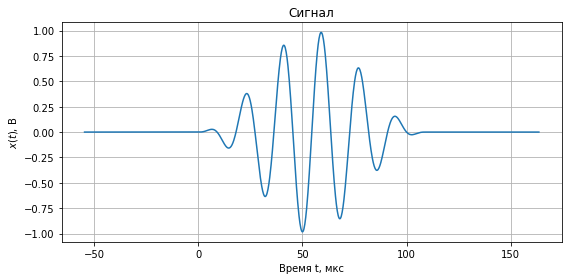

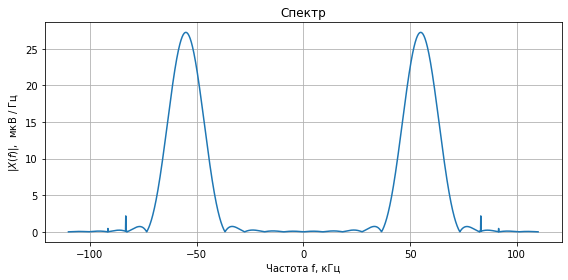

In [109]:
f0=55*1e3       # 10 кГц
tau=109*1e-6    # 500 мкс

def sin_with_boxcar(t, tau):
    #return np.sin(2*np.pi*f0*t)
    if 0<=t<=tau:
        # случай прямоугольного окна
        #return np.sin(2*np.pi*f0*t) 
        # случай окна Ханна
        #
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

## Задача 2.4. Спектр пачки равноотстоящих импульсов

|    Варианты:    |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |
|:---------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|        N        |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |
| $\tau$**, мкс**     | 300 | 50  | 100 | 125 | 250 | 60  | 200 | 400 | 500 | 150 | 450 | 100 |
| $T_{period}$**, мкс** | 600 | 125 | 200 | 275 | 500 | 100 | 400 | 700 | 800 | 300 | 810 | 200 |

Ниже приведен пример вычисления спектр пачки из $N=4$ равноотстоящих импульсов длительностью $\tau = 100$ мкс с периодом повторения $T_{period}=400$ мкс.

Повторить вычисления для заданных значений $N$, $\tau$, $T_{period}$. Сравнить получившийся график с аналитическим выражением для спектра.


<ipython-input-72-c2c171a30ef6>:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-72-c2c171a30ef6>:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


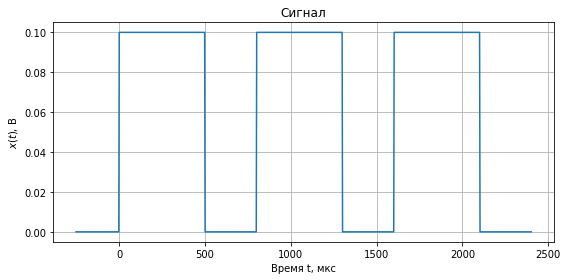

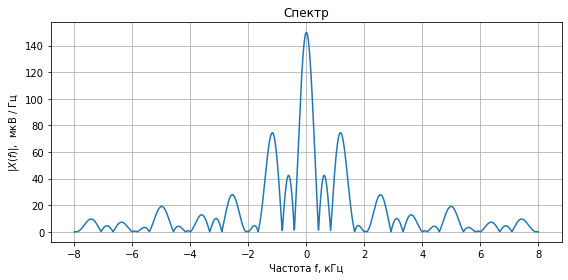

In [87]:
N=3
tau=500e-6 #100 мкс
period = 800e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

# Занятие 3. Эффект наложения спектров при дискретизации сигналов.

In [88]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt


## Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Рассмотреть прямоугольный импульс длительностью $1.05\tau$. Дискретизовать его с частотой $f_s  = 10/ \tau $.  Построить спектр прямоугольного импульса и полученного дискретизованного сигнала. 

Пронаблюдать наложение спектра при дискретизации. 

Найти сигнал,  который дискретизуется такой же последовательностью, как и прямоугольный импульс, но при этом не наблюдается эффект наложения (сигнал, который восстанавливается с помощью интерполяционного ряда Котельникова).

In [89]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

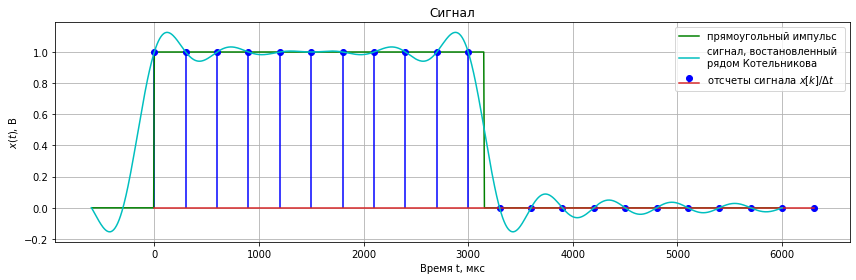

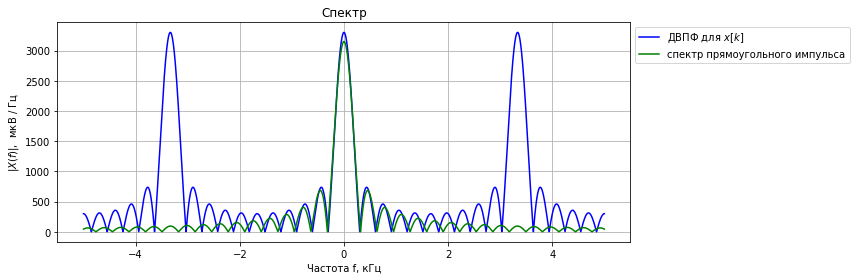

In [90]:
tau=3000*1e-6 #100 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    #print([xk*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    


tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[12, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр прямоугольного импульса')

plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

## Задача 3.2. Эффект наложения при прореживании сигнала

| Варианты: | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |
|:---------:|----|----|----|----|----|----|----|----|----|----|----|----|
| $K_1$     | 35 | 10 | 20 | 25 | 15 | 40 | 20 | 15 | 40 | 35 | 10 | 25 |
| $K_2$     | 70 | 60 | 65 | 80 | 75 | 90 | 85 | 60 | 95 | 80 | 70 | 75 |


Выполнить прореживание (downsampling) сигнала камертона (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $K_1$-ый, а в другом каждый $K_2$-ый отсчет сигнала. В чем принципиальное отличие между спектрограммами получившихся сигналов и какими эффектами оно обусловлено? 

In [92]:
def DTFT_abs(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

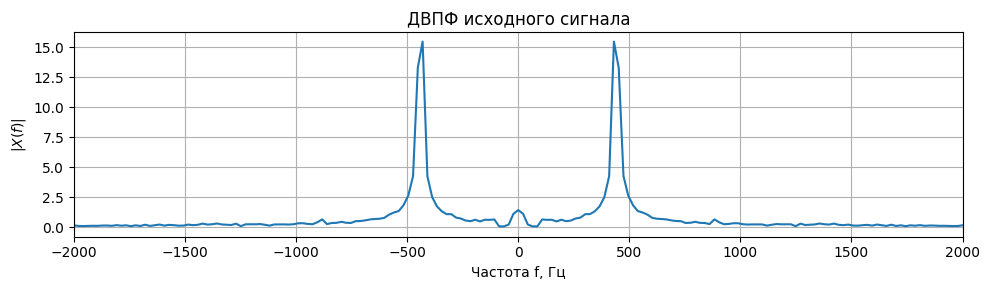

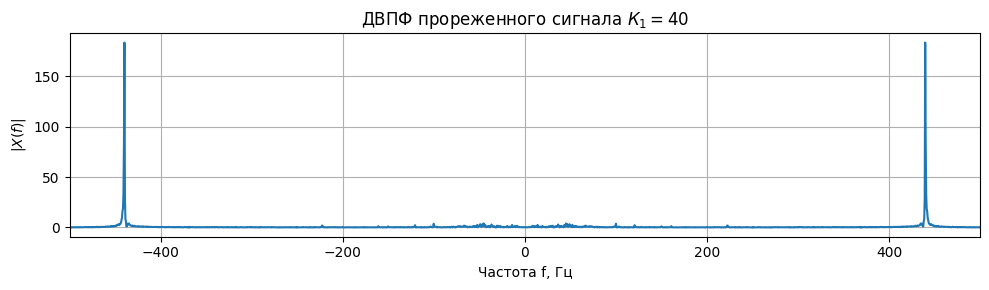

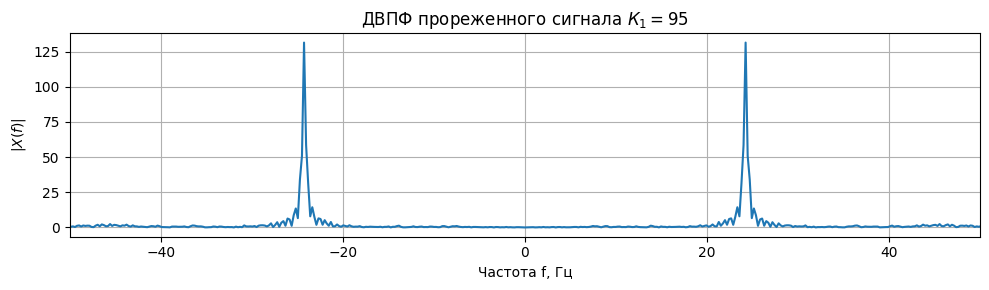

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[10, 3], dpi=100)

plt.xlim((-2000,2000))
DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=40
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end 
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()

plt.xlim((-500,500))
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=95
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()

plt.xlim((-50,50))
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 